In [1]:
import numpy as np 
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from tensorflow.keras import layers, models,callbacks
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
# 載入3D關鍵點資料
X = np.load("../X22point_picture.npy")
y = np.load("../y3t.npy")
print(X[0].shape)
input_shape = X[0].shape
# 將資料分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

(256, 256)


In [4]:
print(y_train)

[1 1 0 2 0 0 1 0 1 1 1 0 0 0 1 0 1 1 2 0 1 0 1 0 1 1 1 2 2 2 0 1 0 1 1 1 0
 1 0 2 2 1 0 1 1 0 2 0 1 0 0 1 1 0 2 0 1 0 1 0 1 2 2 1 0 2 0 2 1 1 0 1 1 0
 0 1 2 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 2 0 2 1 1 1 2 0 2 0 1 2 1 0 1 1 2 2 2
 1 0 0 2 2 0 1 0 0 0 0 0 1 1 0 0 2 2 2 1 2 0 0 0 0 1 0 2 0 1 2 1 1 0 0 0 0
 1 1 0 0]


In [5]:
def VGG16(input_shape=(256, 256, 1), num_classes=10):
    model = models.Sequential()
    
    # Block 1
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 2
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 3
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 4
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 5
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

# 建立VGG16模型
input_shape = (256, 256, 1)
num_classes = 3
model = VGG16(input_shape=input_shape, num_classes=num_classes)


c:\Users\user\anaconda3\envs\dance\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# 訓練模型
history = model.fit(X_train, y_train, epochs=50, 
                    validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 973ms/step - accuracy: 0.3714 - loss: 1.7885 - val_accuracy: 0.2903 - val_loss: 1.1112
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 931ms/step - accuracy: 0.4240 - loss: 1.0796 - val_accuracy: 0.2903 - val_loss: 1.1476
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 848ms/step - accuracy: 0.4563 - loss: 1.0140 - val_accuracy: 0.5806 - val_loss: 0.9530
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 877ms/step - accuracy: 0.6092 - loss: 0.8376 - val_accuracy: 0.5806 - val_loss: 0.8136
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 931ms/step - accuracy: 0.7927 - loss: 0.5360 - val_accuracy: 0.7419 - val_loss: 0.6220
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 972ms/step - accuracy: 0.8410 - loss: 0.4554 - val_accuracy: 0.8387 - val_loss: 0.3981
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9425 - loss: 0.1732 - val_accuracy: 0.8065 - val_loss: 0.4262
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 875ms/step - accuracy: 0.9572 - loss: 0.1072 - val_accuracy: 0.9032 - val_loss: 0.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9441 - loss: 1.1337

Test accuracy: 0.9473684430122375
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step


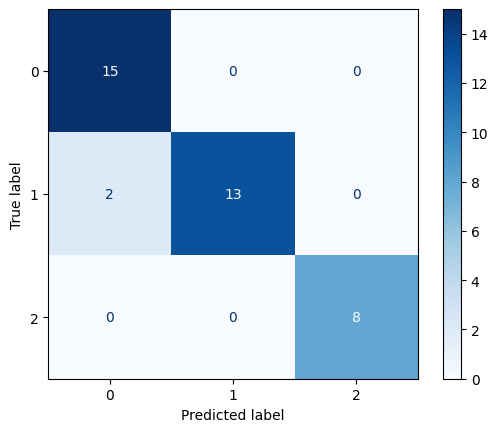

In [7]:
# 評估模型
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f'\nTest accuracy: {test_acc}')

# 生成預測結果
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred_classes)

# 顯示混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [8]:
model.save("cnn_test2.keras")

In [9]:
model = tf.keras.models.load_model("cnn_test2.keras")

In [13]:
print(X_test.shape)

(38, 256, 256)


In [2]:
import tensorflow as tf

# 加载模型并转换为 TFLite 格式
model = tf.keras.models.load_model('./cnn_test.keras')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# 保存模型
with open('cnnmodel.tflite', 'wb') as f:
    f.write(tflite_model)


c:\Users\user\anaconda3\envs\dance\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 34 variables whereas the saved optimizer has 66 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp_9_mjoen\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp_9_mjoen\assets


Saved artifact at 'C:\Users\user\AppData\Local\Temp\tmp_9_mjoen'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  1713394037328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1713394036976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1713394153776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1713394153600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1713394205968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1713394205616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1713394212704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1713394212528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1713394300704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1713394300352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1713394